importing required librabries

In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

download the data from yahoo finanace website

In [49]:
data=yf.download('MRF.NS')

[*********************100%***********************]  1 of 1 completed


In [50]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,910.000000,910.000000,880.000000,897.599976,812.912415,426
2002-07-02,900.000000,905.000000,895.000000,903.650024,818.391663,310
2002-07-03,910.000000,910.000000,900.000000,906.700012,821.153870,336
2002-07-04,920.000000,925.000000,910.000000,916.799988,830.300781,591
2002-07-05,915.000000,935.000000,910.000000,927.299988,839.810181,1623
...,...,...,...,...,...,...
2023-07-14,101450.000000,102400.000000,101264.250000,102141.203125,101973.156250,5109
2023-07-17,102141.203125,102341.203125,101820.500000,101988.148438,101820.351562,2065
2023-07-18,102000.000000,102499.953125,101611.046875,102245.453125,102077.234375,3212


converting data into csv formate

In [5]:
data.to_csv('MRF.csv')

In [51]:
df = pd.read_csv('MRF.csv')

In [52]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,910.0,910.0,880.0,897.599976,812.912537,426
1,2002-07-02,900.0,905.0,895.0,903.650024,818.391724,310
2,2002-07-03,910.0,910.0,900.0,906.700012,821.153809,336
3,2002-07-04,920.0,925.0,910.0,916.799988,830.301147,591
4,2002-07-05,915.0,935.0,910.0,927.299988,839.810364,1623


In [53]:
df.shape

(5231, 7)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5231 entries, 0 to 5230
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5231 non-null   object 
 1   Open       5231 non-null   float64
 2   High       5231 non-null   float64
 3   Low        5231 non-null   float64
 4   Close      5231 non-null   float64
 5   Adj Close  5231 non-null   float64
 6   Volume     5231 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 286.2+ KB


ploting and visualize the closing price of the stock

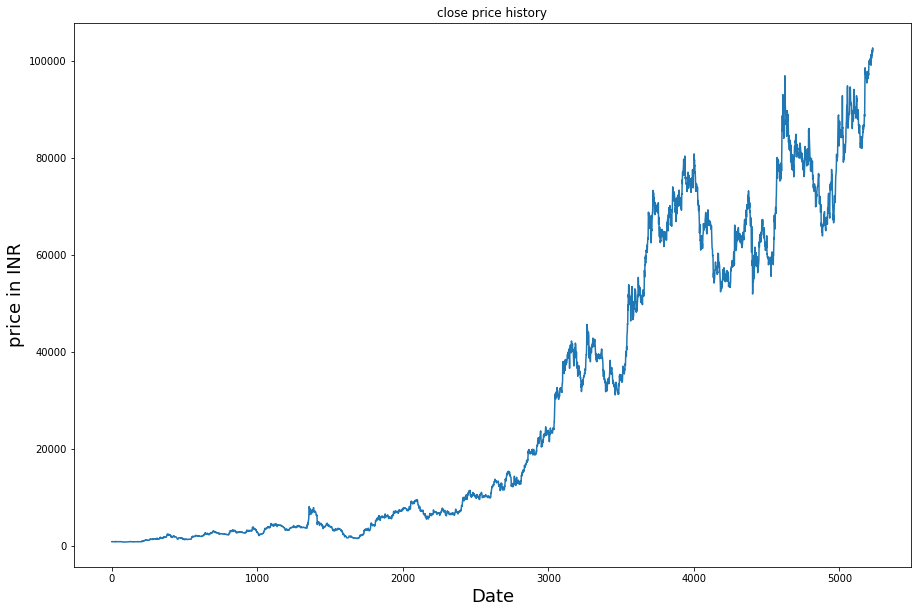

In [55]:
plt.figure(figsize=(15,10))
plt.title("close price history")
plt.plot(df['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("price in INR",fontsize=18)
plt.show()

create a new dataframe which contain only Close values

In [59]:
Data = df.filter(['Close']).values
print(Data.shape)

(5231, 1)


Normalize the data between 0 and 1 using the MinMaxScaler

In [60]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Data)

Train the dataset

In [61]:
train_data = scaled_data[:int(len(scaled_data)*0.8)]
x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Building the LSTM model for the train data

In [62]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
130/130 [==============================] - 23s 97ms/step - loss: 0.0041
Epoch 2/50
130/130 [==============================] - 13s 97ms/step - loss: 0.0013
Epoch 3/50
130/130 [==============================] - 13s 97ms/step - loss: 0.0011
Epoch 4/50
130/130 [==============================] - 13s 96ms/step - loss: 8.5135e-04
Epoch 5/50
130/130 [==============================] - 12s 95ms/step - loss: 8.9573e-04
Epoch 6/50
130/130 [==============================] - 13s 97ms/step - loss: 9.6619e-04
Epoch 7/50
130/130 [==============================] - 12s 95ms/step - loss: 7.0136e-04
Epoch 8/50
130/130 [==============================] - 12s 95ms/step - loss: 7.1145e-04
Epoch 9/50
130/130 [==============================] - 12s 94ms/step - loss: 7.2609e-04
Epoch 10/50
130/130 [==============================] - 12s 95ms/step - loss: 6.9609e-04
Epoch 11/50
130/130 [==============================] - 12s 95ms/step - loss: 6.0437e-04
Epoch 12/50
130/130 [==============================] 

Prediction on test data

In [65]:

test_data = scaled_data[int(len(scaled_data)*0.8) - 50:]
x_test = []
y_test = Data[int(len(data)*0.8):, :]

for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

33/33 [==============================] - 3s 33ms/step


visualization of actual vs predicted values

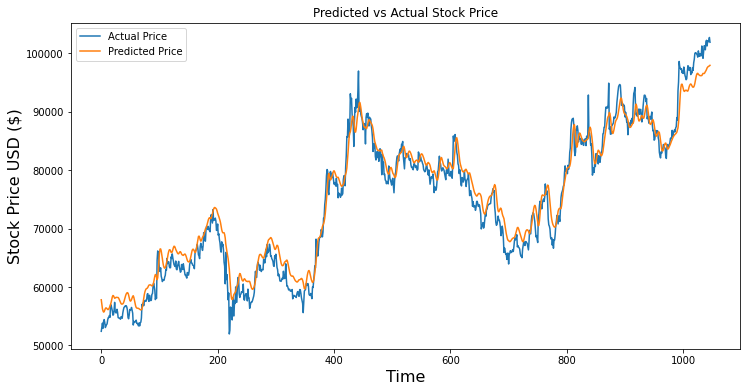

In [66]:
plt.figure(figsize=(12,6))
plt.title('Predicted vs Actual Stock Price')
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Stock Price USD ($)', fontsize=16)
plt.legend()
plt.show()